In [ ]:
# importando bibliotecas
import pandas as pd # processamento de dados
import seaborn as sns # criação de gráficos
import numpy as np    # algebra linear

# plota gráficos
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Visualização dos dados

In [ ]:
# leitura dos dados com pandas
df = pd.read_csv('/content/data.csv')
# checar a forma dos dados
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

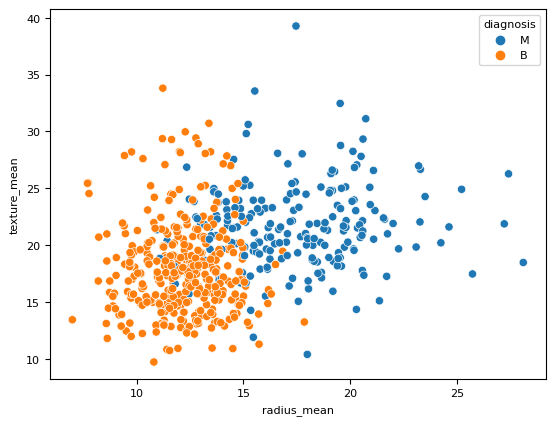

In [ ]:
# percebe-se diagnósticos de câncer maligno com raio e textura médias maiores
sns.scatterplot(x=df['radius_mean'],y=df['texture_mean'], hue=df['diagnosis'])

# Limpeza dos dados

In [ ]:
# Retirando a coluna de id e Unnamed
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Mapeamento da variável categórica diagnosis
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 31)

# Exploração dos dados

In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


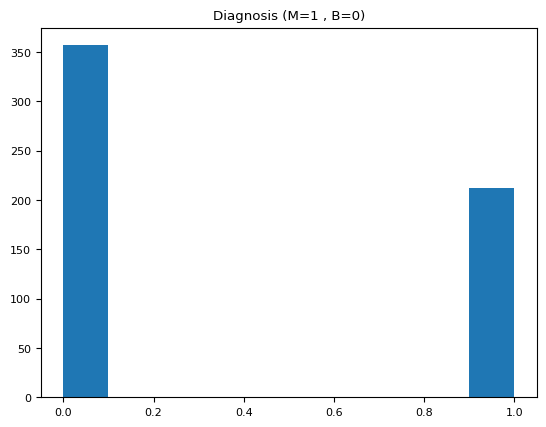

In [ ]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

# Atributos das células e diagnóstico

In [ ]:
features_mean=list(df.columns[1:11])
# Divisão do dataframe em dois baseado no diagnóstico
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

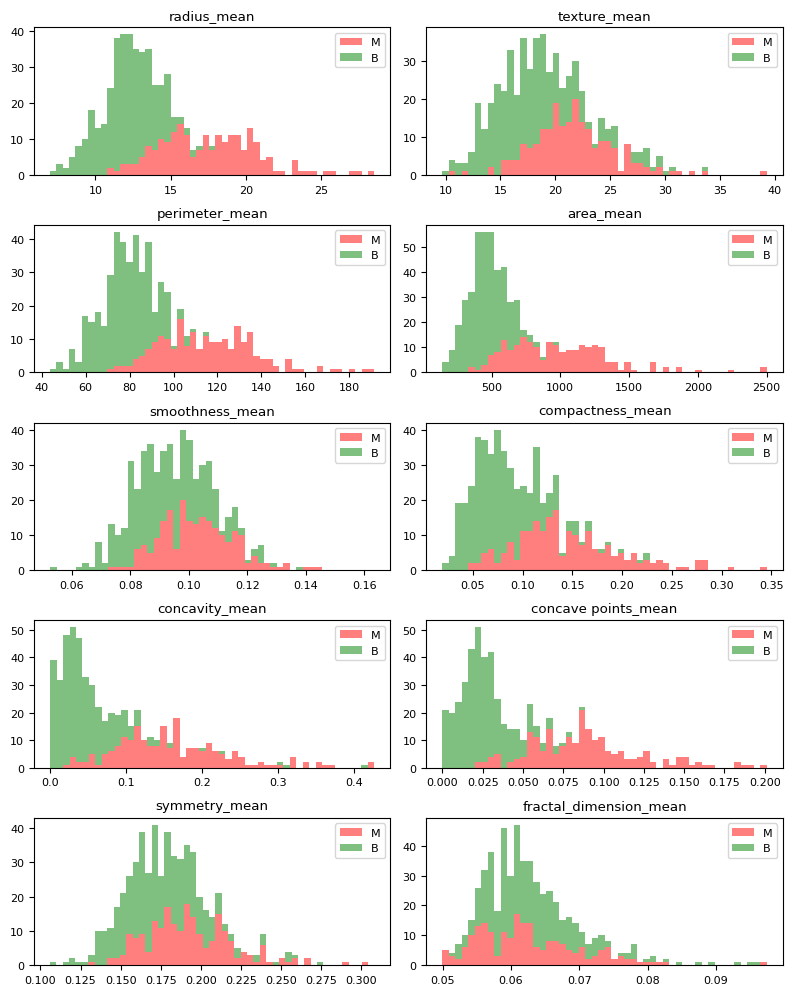

In [ ]:
# Empilhando os dados
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) ,alpha=0.5,stacked=True,  label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

# percebe-se que quando radius, perimeter, area, compactness, concavity, concave_points médios aumentam o diagnóstico de tumores malignos aumentam
# enquanto texture, smoothness, symmetry e fractal_dimension médios parecem não se sobressair quanto à tumores malignas ou benignas

# Divisão de dados

In [ ]:
# Divisão dos dados em atributos (X) e target (Y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)


# Ajustando e avaliando o modelo

In [121]:
# Criação da árvore de decisão
clf = DecisionTreeClassifier()

# treinamento do classificador com nossos dados
clf = clf.fit(X_train,y_train)

# Predição da resposta para o dataset
y_pred = clf.predict(X_test)

In [122]:
# Testando a acurácia da árvore de decisão
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.9385964912280702


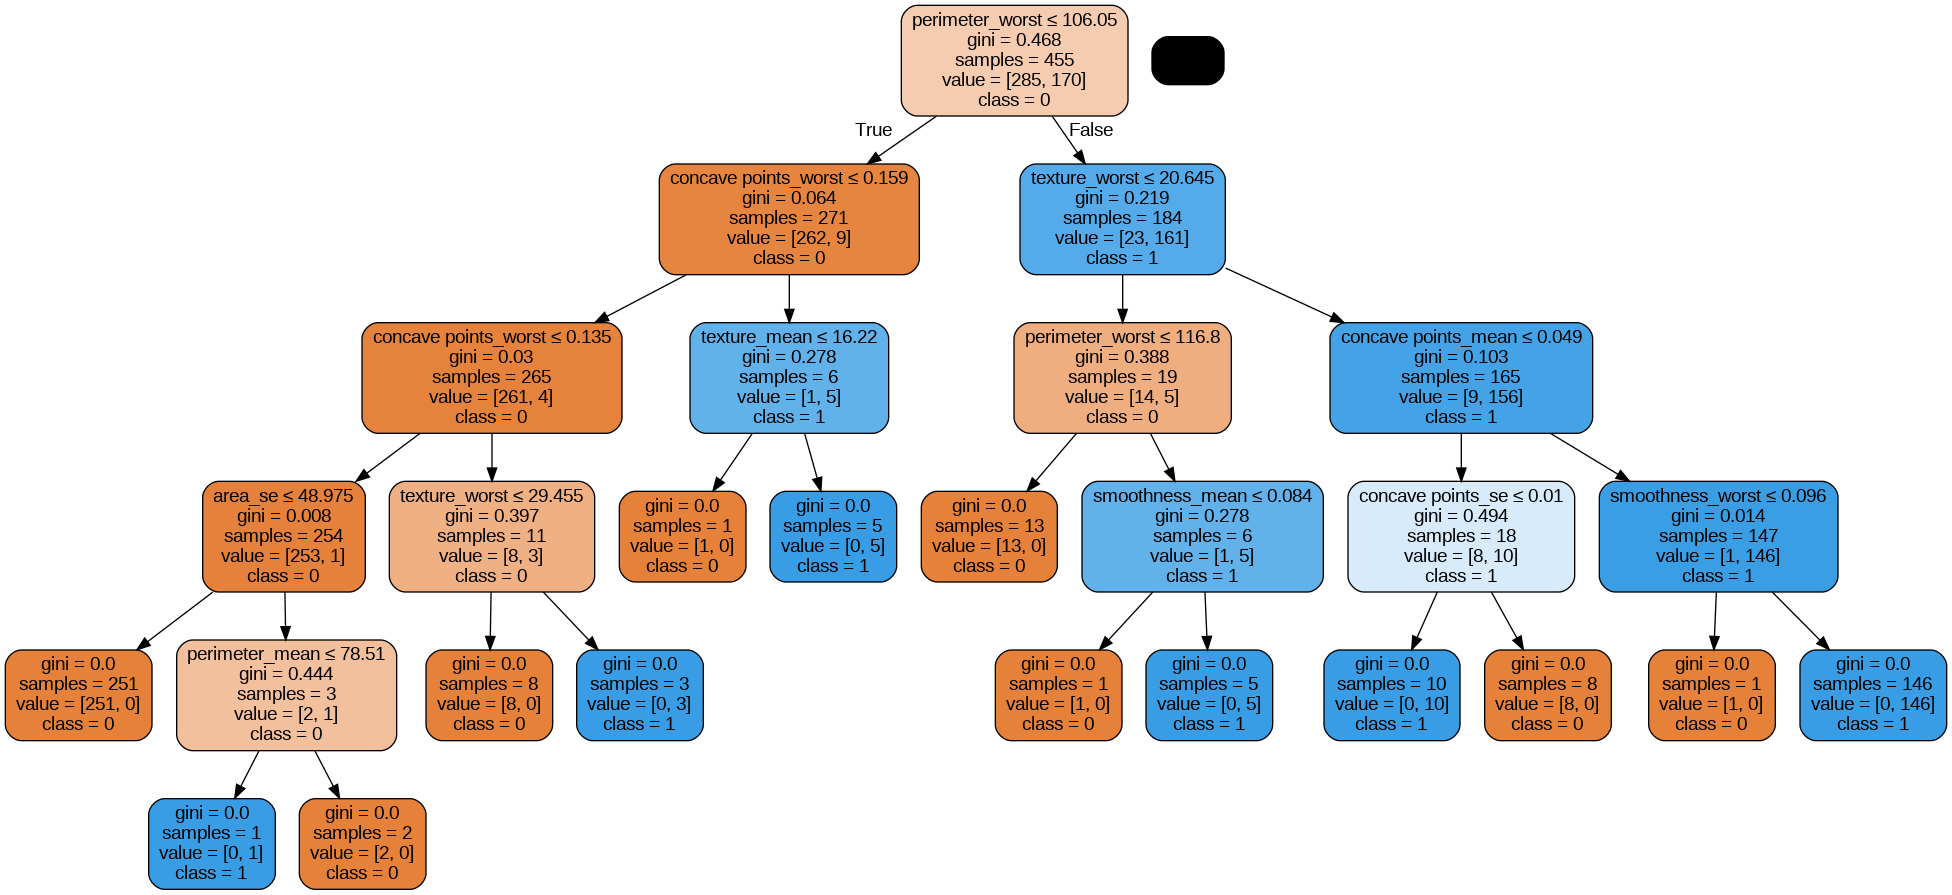

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('data.png')
Image(graph.create_png())

In [ ]:
for i in range(1,11):
  # Criação da árvore de decisão
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)

  # treinamento do classificador com nossos dados
  clf = clf.fit(X_train,y_train)

  # Predição da resposta para o dataset
  y_pred = clf.predict(X_test)

  # Testando a acurácia
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred),"para máximo de profundidade = ", i)

Accuracy: 0.868421052631579 para máximo de profundidade =  1
Accuracy: 0.868421052631579 para máximo de profundidade =  2
Accuracy: 0.9122807017543859 para máximo de profundidade =  3
Accuracy: 0.9649122807017544 para máximo de profundidade =  4
Accuracy: 0.9473684210526315 para máximo de profundidade =  5
Accuracy: 0.9473684210526315 para máximo de profundidade =  6
Accuracy: 0.9473684210526315 para máximo de profundidade =  7
Accuracy: 0.9385964912280702 para máximo de profundidade =  8
Accuracy: 0.9385964912280702 para máximo de profundidade =  9
Accuracy: 0.956140350877193 para máximo de profundidade =  10


# Percebemos que a maior acurácia com o critério de entropia é com a profundidade = 4

In [130]:
# Criação da árvore de decisão
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# treinamento do classificador com nossos dados
clf = clf.fit(X_train,y_train)

# Predição da resposta para o dataset
y_pred = clf.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Acurácia: 0.9649122807017544
Precisão: 1.0
Recall: 0.9047619047619048


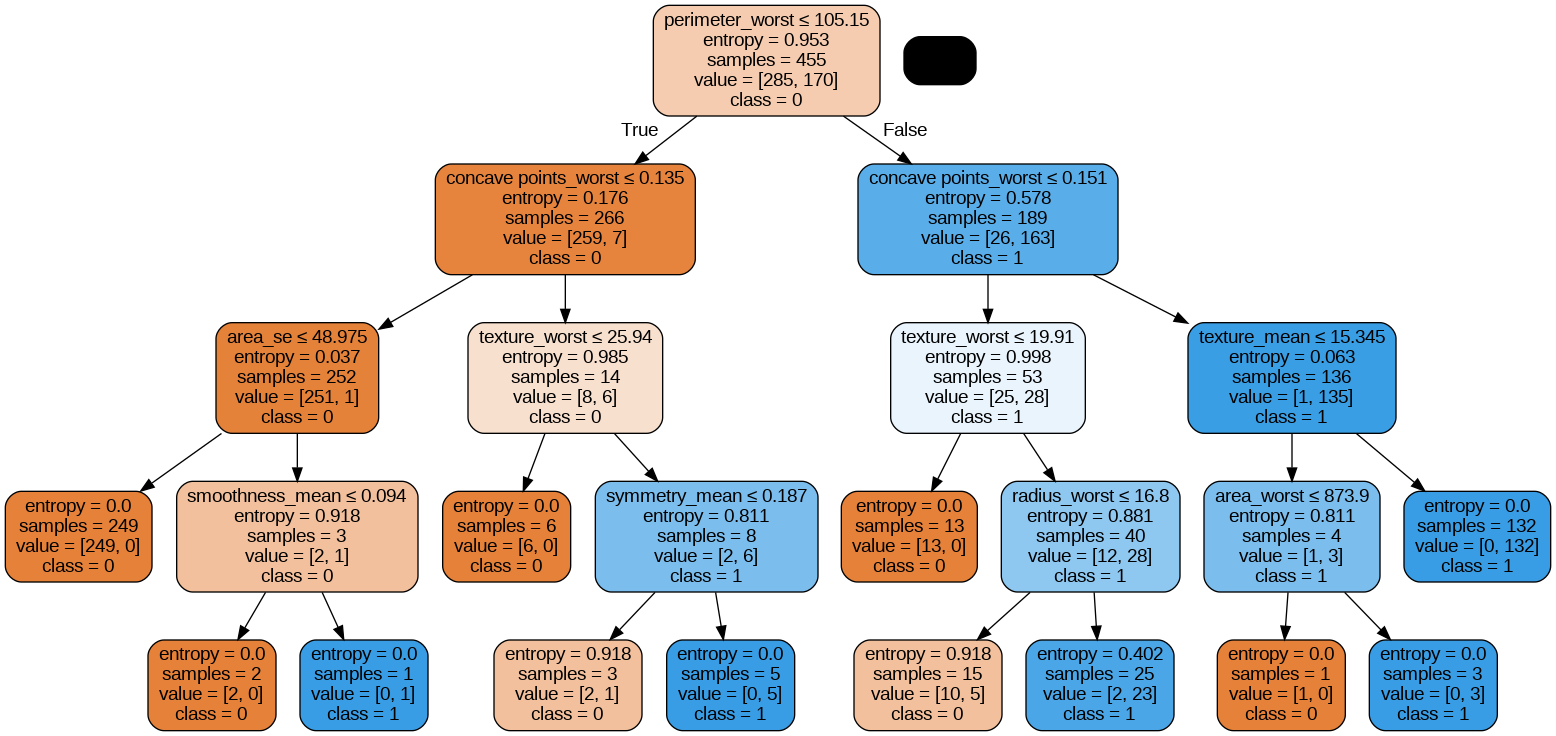

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('data.png')
Image(graph.create_png())